In [1]:
!pip uninstall scikit-learn -y
!pip uninstall xgboost -y
!pip install scikit-learn==1.3.2
!pip install xgboost==1.7.0
!pip install  -U autogluon


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: xgboost 2.0.3
Uninstalling xgboost-2.0.3:
  Successfully uninstalled xgboost-2.0.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 0.12.1 requires xgboost>=1.1.0, which is not installed.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
ERROR: Could not find a version that satisfies the requirement xgboost==1.7.0 (from versions: 0.4a12, 0.4a13, 0.4a14, 0.4a15, 0.4a18, 0.4a19, 0.4a20, 0.4a21, 0.4a22, 0.4a23, 0.4a24, 0.4a25, 0.4a26, 0.4a27, 0.4a28, 0.4a29, 0.4a30, 0.6a1, 0.6a2, 0.7.post3,

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv
/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv


In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")

In [4]:
"""
train_extra_df =pd.read_csv("/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv")
train_extra_df.columns = train_extra_df.columns.str.replace(' ', '')
train_extra_df['rainfall'] = train_extra_df['rainfall'].map({'no': 0, 'yes': 1})
train_extra_df['humidity'] = train_extra_df['humidity'].astype(float)
train_extra_df['cloud'] = train_extra_df['cloud'].astype(float)
train_extra_df['id'] = np.arange(2190, 2190 + len(train_extra_df))

# order the features the same way as train
train_features = list(train_df)
train_extra_df = train_extra_df[train_features]
"""

'\ntrain_extra_df =pd.read_csv("/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv")\ntrain_extra_df.columns = train_extra_df.columns.str.replace(\' \', \'\')\ntrain_extra_df[\'rainfall\'] = train_extra_df[\'rainfall\'].map({\'no\': 0, \'yes\': 1})\ntrain_extra_df[\'humidity\'] = train_extra_df[\'humidity\'].astype(float)\ntrain_extra_df[\'cloud\'] = train_extra_df[\'cloud\'].astype(float)\ntrain_extra_df[\'id\'] = np.arange(2190, 2190 + len(train_extra_df))\n\n# order the features the same way as train\ntrain_features = list(train_df)\ntrain_extra_df = train_extra_df[train_features]\n'

In [5]:
#train_df = pd.concat([train_df, train_extra_df], axis=0, ignore_index=True)
#train_df = train_df.drop_duplicates()
display(train_df.shape)
display("Missing Train Values")
display(train_df.isnull().sum())
display("Missing Test Values")
display(test_df.isnull().sum())

(2190, 13)

'Missing Train Values'

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

'Missing Test Values'

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [6]:
# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
test_df['winddirection'] = imputer.fit_transform(test_df[['winddirection']])
#train_df['winddirection']=imputer.fit_transform(train_df[['winddirection']])
#train_df['windspeed']=imputer.fit_transform(train_df[['windspeed']])

In [7]:
# Feature Augmentation
for df in [train_df, test_df]:
    #df['humidity_temp_pressure'] = df['humidity'] * df['temparature'] * df['pressure'] / 1000
    #df['dewpoint_depression'] = df['temparature'] - df['dewpoint']  

    #df['heat_index'] = 0.5 * (df['temparature'] + 61.0 + ((df['temparature']-68.0)*1.2) + (df['humidity']*0.094))
    #df['comfort_index'] = df['temparature'] - (0.55 - 0.0055 * df['humidity']) * (df['temparature'] - 14.5)

    #df['day_of_year_sin'] = np.sin(2 * np.pi * (df['day'] - 81)/365) 
    #df['day_of_year_cos'] = np.cos(2 * np.pi * (df['day'] - 81)/365)

    #for window in [3, 7]:
    #    df[f'humidity_change_{window}day'] = df['humidity'].diff(window)
        
    #df['cloud_humidity'] =  df['humidity'] * df['cloud']
    #df['humidity_pressure'] = df['humidity'] * df['pressure'] 
    #df['humidity_sunshine'] = df['humidity'] * df['sunshine'] 
    
    #df['humidity_temp_ratio'] =  df['humidity'] / (df['temparature'] + 1)
    df['temp_humidity_interaction'] = df['temparature'] * df['humidity']
    df['cloud_sun_ratio'] = df['cloud'] / (df['sunshine'] + 1)
    #df['temp_pressure'] = df['temparature'] * df['pressure']
    
    #df['day_sin'] = np.sin(2 * np.pi * df['day']/365)
    #df['day_cos'] = np.cos(2 * np.pi * df['day']/365)
    
    #df['pressure_diff'] = df['pressure'] - df['pressure'].shift(1)
    #df['humidity_diff'] = df['humidity'] - df['humidity'].shift(1)
    
    #df['temp_range'] = df['maxtemp'] - df['mintemp']
    #df["avg_temp"] = (df["maxtemp"] + df["mintemp"]) / 2

    #df['wind_x'] = df['windspeed'] * np.cos(np.radians(df['winddirection']))
    #df['wind_y'] = df['windspeed'] * np.sin(np.radians(df['winddirection']))

    # saturated vapor pressure
    #def calc_saturation_vapor_pressure(temp):
    #    return 6.11 * np.exp((17.27 * temp) / (temp + 237.3))

    #df['e_s_temp'] = calc_saturation_vapor_pressure(df['temparature'])
    #df['e_s_dewpoint'] = calc_saturation_vapor_pressure(df['dewpoint'])

    # vapor pressure deficit
    #df['vapor_pressure_deficit'] = df['e_s_temp'] - df['e_s_dewpoint']

    # wet-bulb temperature
    #def calc_wet_bulb(T, RH):
    #    return T * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) + \
    #           np.arctan(T + RH) - np.arctan(RH - 1.676331) + \
    #           0.00391838 * RH**(3/2) * np.arctan(0.023101 * RH) - 4.686035

    #df['wet_bulb_temp'] = calc_wet_bulb(df['temparature'], df['humidity'])
    #df['precipitable_water'] = np.exp(df['dewpoint'] / df['temparature']) * df['humidity']
    #df['humidity_temp_range'] = df['humidity'] * df['temp_range']
    #df['presusure_vapor'] = df['pressure'] * df['vapor_pressure_deficit']
    #df.bfill(inplace=True)

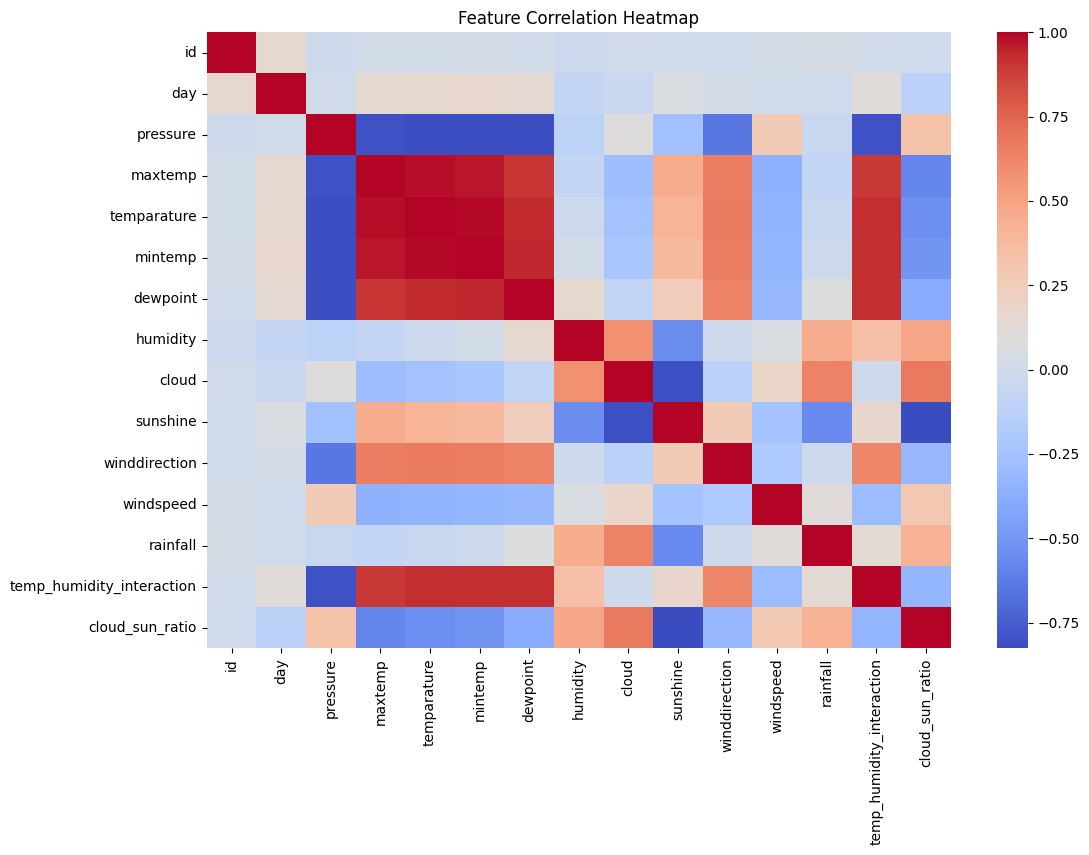

In [8]:
# Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), cmap='coolwarm') #, annot=True, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

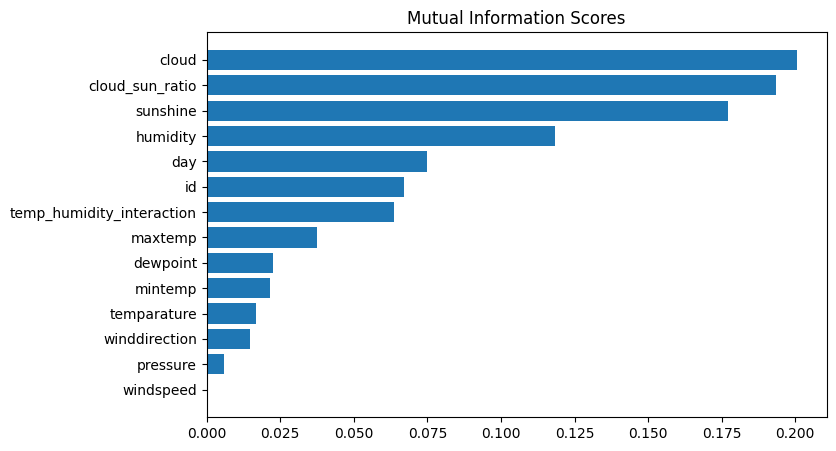

In [9]:
# Mutual Information Scores
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = train_df.drop(columns=['rainfall']) 
y = train_df['rainfall']
mi_scores = make_mi_scores(X, y)
mi_scores[::3] 

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [10]:
# AutoML-Gluon to take care of the best stack of ML models 
from autogluon.core.metrics import make_scorer
from autogluon.tabular import TabularPredictor

automl_predictor = TabularPredictor(
                                  label='rainfall', 
                                  eval_metric='roc_auc',
                                  problem_type='binary'
                                 )

automl_predictor.fit(train_df,
                     presets='best_quality',
                     time_limit=3600 * 4,
                     keep_only_best=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20250508_050106"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       30.20 GB / 31.35 GB (96.3%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

(_ray_fit pid=4120) [1000]	valid_set's binary_logloss: 0.303
(_ray_fit pid=4254) [1000]	valid_set's binary_logloss: 0.293852 [repeated 2x across cluster]


(_dystack pid=307) 	0.895	 = Validation score   (roc_auc)
(_dystack pid=307) 	17.39s	 = Training   runtime
(_dystack pid=307) 	0.23s	 = Validation runtime
(_dystack pid=307) Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1925.09s of the 3122.43s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=307) 	0.8922	 = Validation score   (roc_auc)
(_dystack pid=307) 	42.72s	 = Training   runtime
(_dystack pid=307) 	0.24s	 = Validation runtime
(_dystack pid=307) Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 1875.34s of the 3072.68s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.25%)
(_dystack pid=307) 	0.8801	 = Validation score   (roc_auc)
(_dystack pid=307) 	21.17s	 = Training   runtime
(_dystack pid=307)

(_ray_fit pid=10828) [1000]	valid_set's binary_logloss: 0.326462
(_ray_fit pid=10830) [1000]	valid_set's binary_logloss: 0.304218
(_ray_fit pid=10965) [1000]	valid_set's binary_logloss: 0.313979 [repeated 4x across cluster]


(_dystack pid=307) 	0.8944	 = Validation score   (roc_auc)
(_dystack pid=307) 	26.02s	 = Training   runtime
(_dystack pid=307) 	1.73s	 = Validation runtime
(_dystack pid=307) Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 975.82s of the 2173.16s of remaining time.
(_dystack pid=307) /usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=307)   warnings.warn(
(_dystack pid=307) 	0.883	 = Validation score   (roc_auc)
(_dystack pid=307) 	3.33s	 = Training   runtime
(_dystack pid=307) 	0.18s	 = Validation runtime
(_dystack pid=307) Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 972.25s of the 2169.59s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFit

(_ray_fit pid=14964) [1000]	valid_set's binary_logloss: 0.296372 [repeated 3x across cluster]


(_dystack pid=307) 	0.8955	 = Validation score   (roc_auc)
(_dystack pid=307) 	18.59s	 = Training   runtime
(_dystack pid=307) 	0.12s	 = Validation runtime
(_dystack pid=307) Fitting model: NeuralNetTorch_r143_BAG_L1 ... Training model for up to 242.85s of the 1440.19s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=307) 	0.8953	 = Validation score   (roc_auc)
(_dystack pid=307) 	56.32s	 = Training   runtime
(_dystack pid=307) 	0.19s	 = Validation runtime
(_dystack pid=307) Fitting model: CatBoost_r128_BAG_L1 ... Training model for up to 179.52s of the 1376.86s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=1.37%)
(_dystack pid=307) 	0.8905	 = Validation score   (roc_auc)
(_dystack pid=307) 	50.72s	 = Training   runtime
(_dystack pid=30

(_ray_fit pid=20126) [1000]	valid_set's binary_logloss: 0.28717
(_ray_fit pid=20126) [2000]	valid_set's binary_logloss: 0.27936
(_ray_fit pid=20126) [3000]	valid_set's binary_logloss: 0.277668
(_ray_fit pid=20126) [4000]	valid_set's binary_logloss: 0.276948


(_dystack pid=307) 	0.8992	 = Validation score   (roc_auc)
(_dystack pid=307) 	21.88s	 = Training   runtime
(_dystack pid=307) 	0.2s	 = Validation runtime
(_dystack pid=307) Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 622.16s of the 622.02s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=307) 	0.8963	 = Validation score   (roc_auc)
(_dystack pid=307) 	57.97s	 = Training   runtime
(_dystack pid=307) 	0.33s	 = Validation runtime
(_dystack pid=307) Fitting model: XGBoost_r33_BAG_L2 ... Training model for up to 558.70s of the 558.57s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.86%)
(_dystack pid=307) 	0.8873	 = Validation score   (roc_auc)
(_dystack pid=307) 	26.75s	 = Training   runtime
(_dystack pid=307) 	0.

In [11]:
automl_predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.903226,roc_auc,1.851896,484.414171,0.001615,0.350558,2,True,7
1,NeuralNetTorch_r135_BAG_L1,0.896603,roc_auc,0.206300,59.679551,0.206300,59.679551,1,True,6
2,NeuralNetFastAI_r134_BAG_L1,0.896524,roc_auc,0.878302,218.816710,0.878302,218.816710,1,True,4
3,NeuralNetTorch_r143_BAG_L1,0.895851,roc_auc,0.173325,76.899821,0.173325,76.899821,1,True,5
4,NeuralNetFastAI_r102_BAG_L1,0.894551,roc_auc,0.524076,90.166448,0.524076,90.166448,1,True,1
5,CatBoost_r50_BAG_L1,0.893483,roc_auc,0.040422,17.887156,0.040422,17.887156,1,True,2
6,CatBoost_r167_BAG_L1,0.892927,roc_auc,0.027856,20.613927,0.027856,20.613927,1,True,3


In [12]:
automl_predictor.save("/kaggle/working/autogluon_rainfall_rmse_model")

In [13]:
y_test = automl_predictor.predict_proba(test_df, as_multiclass=False)
submission = pd.DataFrame({
    "id": test_df["id"],
    "Calories": y_test
})

submission.to_csv("submission.csv", index=False)